In [1]:
import pandas as pd
import numpy as np

### Hyperparameters and Loading in Data

In [2]:
val_pct = 0.2
batch_size = 100
hidden_layer_size = 12
learning_rate = 0.001
epochs=50

In [3]:
data=pd.read_csv('train.csv',parse_dates=['date_time'])

In [4]:
#data.info()

In [5]:
data['date_time']

0      2010-03-10 18:00:00
1      2010-03-10 19:00:00
2      2010-03-10 20:00:00
3      2010-03-10 21:00:00
4      2010-03-10 22:00:00
               ...        
7106   2010-12-31 20:00:00
7107   2010-12-31 21:00:00
7108   2010-12-31 22:00:00
7109   2010-12-31 23:00:00
7110   2011-01-01 00:00:00
Name: date_time, Length: 7111, dtype: datetime64[ns]

In [6]:
data['date_time'].iloc[0].hour

18

### Feature Engineering

In [7]:
data['month']=data['date_time'].apply(lambda x: x.month)
data['hour']=data['date_time'].apply(lambda x: x.hour)

In [8]:
data

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3,18
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,3,19
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,3,20
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,3,21
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1,12,20
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3,12,21
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4,12,22
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8,12,23


In [9]:
def get_season(row):
    if int(row) == 12 or int(row) <= 2:
        return 'Winter'
    elif int(row) > 2 and int(row) <= 5:
        return 'Spring'
    elif int(row) > 6 and int(row) <=9 :
        return 'Summer'
    else:
        return "Fall"
    
def get_timeOfDay(row):
    if int(row) > 4 and int(row) <= 10:
        return "Morning"
    elif int(row) > 11 and int(row) <= 20:
        return "Daytime"
    else:
        return "Nighttime"

    
    
data['season']=data['month'].apply(get_season)
data['time_of_day']=data['hour'].apply(get_timeOfDay)

In [10]:
data.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour,season,time_of_day
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3,18,Spring,Daytime
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,3,19,Spring,Daytime
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,3,20,Spring,Daytime
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,3,21,Spring,Nighttime
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,3,22,Spring,Nighttime


In [11]:
data['season'].value_counts()

Summer    2208
Fall      2184
Spring    1974
Winter     745
Name: season, dtype: int64

In [12]:
data['time_of_day'].value_counts()

Nighttime    2668
Daytime      2667
Morning      1776
Name: time_of_day, dtype: int64

In [13]:
new_data=data.copy()

In [14]:
#data.info()

In [15]:
#data.shape

In [16]:
#"High"

In [17]:
#data.isnull().sum()

In [18]:
## Metric
# MEan Squared Error --> 0

In [19]:
#data.corr()

<AxesSubplot:>

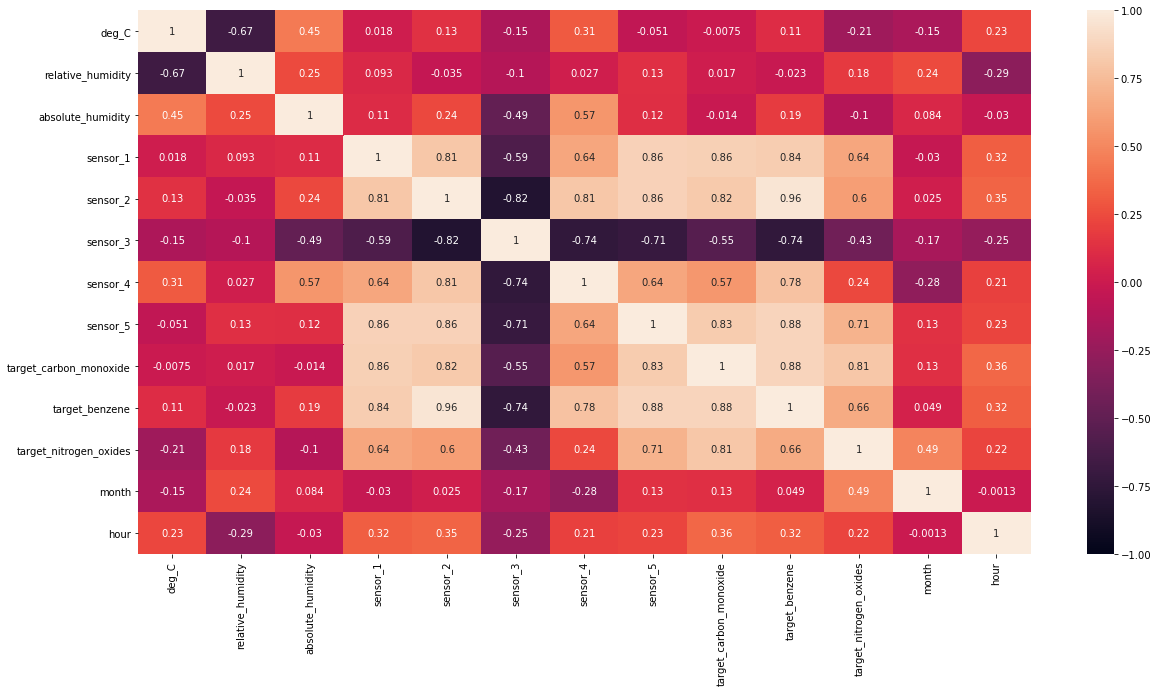

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(new_data.corr(),vmin=-1,vmax=1,annot=True)

### Preprocessing

#### Popping out target variables

In [21]:
carbon_monoxide_col = data.pop('target_carbon_monoxide')
benzene_col = data.pop('target_benzene')
nitrogen_oxide_col = data.pop('target_nitrogen_oxides')


data

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,month,hour,season,time_of_day
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,3,18,Spring,Daytime
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,3,19,Spring,Daytime
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,3,20,Spring,Daytime
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,3,21,Spring,Nighttime
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,3,22,Spring,Nighttime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,12,20,Winter,Daytime
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,12,21,Winter,Nighttime
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,12,22,Winter,Nighttime
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,12,23,Winter,Nighttime


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          7111 non-null   datetime64[ns]
 1   deg_C              7111 non-null   float64       
 2   relative_humidity  7111 non-null   float64       
 3   absolute_humidity  7111 non-null   float64       
 4   sensor_1           7111 non-null   float64       
 5   sensor_2           7111 non-null   float64       
 6   sensor_3           7111 non-null   float64       
 7   sensor_4           7111 non-null   float64       
 8   sensor_5           7111 non-null   float64       
 9   month              7111 non-null   int64         
 10  hour               7111 non-null   int64         
 11  season             7111 non-null   object        
 12  time_of_day        7111 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(2)
memory us

#### One hot encoding for categorical data


In [23]:
data = pd.get_dummies(data, drop_first = True)

data

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,month,hour,season_Spring,season_Summer,season_Winter,time_of_day_Morning,time_of_day_Nighttime
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,3,18,1,0,0,0,0
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,3,19,1,0,0,0,0
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,3,20,1,0,0,0,0
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,3,21,1,0,0,0,1
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,3,22,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,12,20,0,0,1,0,0
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,12,21,0,0,1,0,1
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,12,22,0,0,1,0,1
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,12,23,0,0,1,0,1


In [24]:
drop_columns = ['date_time', 'month', 'hour']
data.drop(drop_columns, axis=1,inplace=True)

In [25]:
data

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,season_Spring,season_Summer,season_Winter,time_of_day_Morning,time_of_day_Nighttime
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,1,0,0,0,0
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,1,0,0,0,0
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,1,0,0,0,0
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,1,0,0,0,1
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,0,0,1,0,0
7107,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,0,0,1,0,1
7108,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,0,0,1,0,1
7109,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,0,0,1,0,1


In [26]:
data.isna().sum()

deg_C                    0
relative_humidity        0
absolute_humidity        0
sensor_1                 0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_5                 0
season_Spring            0
season_Summer            0
season_Winter            0
time_of_day_Morning      0
time_of_day_Nighttime    0
dtype: int64

In [27]:
data.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,season_Spring,season_Summer,season_Winter,time_of_day_Morning,time_of_day_Nighttime
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,0.277598,0.310505,0.104767,0.249754,0.375193
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,0.447846,0.462733,0.306275,0.432901,0.484207
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,1.000000,1.000000,0.000000,0.000000,1.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# RandomForestRegressor from sklearn

#feature_importances_

#### Normalize the dataset

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)

In [32]:
scaled_data.min(axis=1)

array([0., 0., 0., ..., 0., 0., 0.])

#### Select Target variables

In [33]:
labels_data={'carbon_monixide':carbon_monoxide_col,'benzene':benzene_col,'nitrogen_oxide':nitrogen_oxide_col}
labels = pd.DataFrame(labels_data)
labels


,carbon_monixide,benzene,nitrogen_oxide
0,2.5,12.0,167.7
1,2.1,9.9,98.9
2,2.2,9.2,127.1
3,2.2,9.7,177.2
4,1.5,6.4,121.8
...,...,...,...
7106,1.3,5.1,191.1
7107,1.4,5.8,221.3
7108,1.6,5.2,227.4
7109,1.5,4.6,199.8


In [34]:
# # Create validation split by taking a percentage of the training set:

# def split_indices(dataset, pct):
#     length = len(dataset)
#     split = int(length*pct)
#     indices = list(range(length))
#     np.random.shuffle(indices)
#     #indices = np.random.permutation(n)
#     return indices[split:], indices[:split]

# train_indices, val_indices = split_indices(data, val_pct)

# import torch
# from torch.utils.data.dataloader import DataLoader
# from torch.utils.data.sampler import SubsetRandomSampler

# # Use the SubsetRandomSampler to randomly sample the training dataset for 
# # training and validation data. We will feed this into the dataloader below.

# train_sampler = SubsetRandomSampler(train_indices)
# val_sampler = SubsetRandomSampler(val_indices)

# # Create dataloader objects - will be used during training and inference
# # to iterate over the data.

# train_loader = torch.utils.data.DataLoader(data, batch_size = batch_size, \
#                                            sampler = train_sampler)
# val_loader = torch.utils.data.DataLoader(data, batch_size = batch_size, \
#                                          sampler = val_sampler)

#### Split data into Train / Validation datasets

In [35]:
labels.shape

(7111, 3)

In [36]:
data.shape

(7111, 13)

In [37]:
# Create validation split by taking a percentage (defined earlier) of the training set:

import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(data,labels,test_size=val_pct,random_state=0)

# Convert everything into torch tensors

tensor_x = torch.Tensor(X_train.values)
tensor_y = torch.Tensor(y_train.values)

training_data = TensorDataset(tensor_x,tensor_y)

tensor_x = torch.Tensor(X_val.values)
tensor_y = torch.Tensor(y_val.values)
val_data = TensorDataset(tensor_x,tensor_y)

# # Create dataloader objects - will be used during training and inference
# # to iterate over the data.

train_loader = torch.utils.data.DataLoader(training_data, batch_size = batch_size )
val_loader = torch.utils.data.DataLoader(val_data, batch_size = batch_size)

In [38]:
train_features, train_labels=next(iter(train_loader))

In [39]:
val_features, val_labels=next(iter(val_loader))

In [40]:
#dataiter = iter(val_loader)
#features, labels = dataiter.next()

#### Build NN Model

In [41]:
import torch.nn as nn

# Here we are going to create our neural network class by inheiriting the 
# nn.Module class. The main functions to notice are the initialization function 
# __init__() and forward propagation function forward().

class Model(nn.Module):
    
  # We initialize our neural net by defining the input size, number of nodes
  # in hidden layers, and the total number of classes we are detecting.
  def __init__(self, input_size, hidden_size, num_classes):
    super(Model, self).__init__()

    # 1st Fully-Connected Layer: 13 (input nodes or features) -> 12 (hidden nodes)
    self.fc1 = nn.Linear(input_size, hidden_size)
    
    # Applying activation function
    self.relu = nn.ReLU()

    # 2nd Fully-Connected Layer: 12 (hidden nodes) -> 12 (hidden nodes)
    self.fc2 = nn.Linear(hidden_size, hidden_size)

    # Output Layer: 16 (hidden nodes) -> 3 (output class)
    self.fc3 = nn.Linear(hidden_size, num_classes)
  
  # Below we construct the output of the forward propagation pass of the neural
  # net using the layers and activation functions defined in the Net constructor.
  def forward(self, x):

    # Feeding input layer into the hidden layer and activation function
    out = self.fc1(x)
    
    out = self.relu(out)
    
    # Feeding output from first hidden layer to second layer
    out = self.fc2(out)
    
    out = self.relu(out) #tanh,leaky relu
    
    # Feeding output from second hidden layer to output layer
    out = self.fc3(out)
    
    # Returning output from the (3) output layer neurons
    return out

In [42]:
# Create a neural network object with the specified number of input neurons,
# hidden neurons, and output neurons (or total classes)

model = Model(X_train.shape[1], hidden_layer_size, 3)

# Define Loss Function and Optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=-1)

#Decays the learning rate of each parameter group by gamma every step_size epochs. Notice 
#that such decay can happen simultaneously with other changes to the learning rate from outside 
#this scheduler. When last_epoch=-1, sets initial lr as lr.

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.004, last_epoch = -0.01)

In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1696, -0.0175, -0.2192,  0.1770,  0.2608,  0.2540,  0.1412,  0.2543,
           0.1659, -0.0764,  0.0864,  0.1866,  0.0220],
         [ 0.0575, -0.0357,  0.2659, -0.1214, -0.0709, -0.0474, -0.2547,  0.1311,
           0.1035, -0.2761, -0.0736, -0.1033, -0.2578],
         [ 0.1545,  0.2675,  0.0848,  0.0620, -0.0265,  0.2151, -0.2111,  0.2513,
          -0.0366,  0.1026,  0.1512, -0.1409, -0.0566],
         [ 0.0309,  0.1051, -0.2493,  0.0952, -0.0731,  0.2690,  0.2306, -0.0809,
           0.1193, -0.2369,  0.1093,  0.2685, -0.1101],
         [-0.0345,  0.2594, -0.1271, -0.0286,  0.2226, -0.2694,  0.2039, -0.0270,
          -0.0565, -0.1046, -0.1142, -0.2686, -0.0372],
         [ 0.2265, -0.2541,  0.1268, -0.1648,  0.1710,  0.0960, -0.1902,  0.0696,
           0.0938,  0.1582, -0.1076,  0.0585, -0.0344],
         [ 0.1020,  0.0260,  0.1027, -0.0500, -0.0845, -0.2193, -0.2595, -0.0025,
           0.1903, -0.2277,  0.0127,  0.0356, -0.1748],
         [ 

In [44]:
labels

,carbon_monixide,benzene,nitrogen_oxide
0,2.5,12.0,167.7
1,2.1,9.9,98.9
2,2.2,9.2,127.1
3,2.2,9.7,177.2
4,1.5,6.4,121.8
...,...,...,...
7106,1.3,5.1,191.1
7107,1.4,5.8,221.3
7108,1.6,5.2,227.4
7109,1.5,4.6,199.8


In [45]:
train_loss_array = []
val_loss_array = []
    
for epoch in range(epochs):
    # Training Phase
    train_losses=0
    for batch in train_loader:
        train_features, train_labels = batch 
        train_outputs = model(train_features)                  # Generate predictions
        loss = criterion(train_outputs, train_labels) # Calculate loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_losses += loss.item()#

    # Validation phase
    batch_losses=0
    batch_losses_pertarget=torch.zeros(3)
    for batch_val in val_loader:
        val_features, val_labels = batch_val
        val_outputs = model(val_features)                  # Generate predictions
        loss = criterion(val_outputs, val_labels)
        batch_losses += loss.item()#[x['val_loss'] for x in outputs]
        
        batch_losses_pertarget=torch.mean((val_labels-val_outputs)**2,axis=0)
        
        
    epoch_train_loss = train_losses/ np.round(X_train.shape[0]/batch_size)  #torch.stack(batch_losses).mean()
    epoch_loss = batch_losses/ np.round(X_val.shape[0]/batch_size)  #torch.stack(batch_losses).mean()
    
    train_loss_array.append(epoch_train_loss)
    val_loss_array.append(epoch_loss)
    
    epoch_loss_pertarget=torch.mean((val_labels-val_outputs)**2,axis=0)/np.round(X_val.shape[0]/batch_size)
    
    print({'train_loss': epoch_train_loss},{'val_loss': epoch_loss})
    print('Epochs Val Loss per target',epoch_loss_pertarget)


#     result = evaluate(model, val_loader)
#     model.epoch_end(epoch, result)
#     history.append(result)

{'train_loss': 19687.4281883909} {'val_loss': 13036.248046875}
Epochs Val Loss per target tensor([  12.8321,   29.9985, 1832.4733], grad_fn=<DivBackward0>)
{'train_loss': 10179.263320655153} {'val_loss': 10394.461704799107}
Epochs Val Loss per target tensor([   8.9468,    2.0122, 1522.2460], grad_fn=<DivBackward0>)
{'train_loss': 9185.491219503838} {'val_loss': 9616.388078962054}
Epochs Val Loss per target tensor([   5.8970,    2.1023, 1369.7170], grad_fn=<DivBackward0>)
{'train_loss': 8360.625278405976} {'val_loss': 8713.733642578125}
Epochs Val Loss per target tensor([   4.1149,    2.2327, 1195.2097], grad_fn=<DivBackward0>)
{'train_loss': 7439.307261684485} {'val_loss': 7772.883021763393}
Epochs Val Loss per target tensor([   3.1409,    2.2565, 1023.9628], grad_fn=<DivBackward0>)
{'train_loss': 6534.224553693804} {'val_loss': 6874.453944614956}
Epochs Val Loss per target tensor([  2.3419,   1.8725, 870.9132], grad_fn=<DivBackward0>)
{'train_loss': 5706.543328536184} {'val_loss': 608

In [46]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train)

5688
13
      deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  \
6405   19.8               61.4             1.2757    1447.2    1180.2   
6379   13.5               69.5             1.0167    1297.0    1265.2   
413    10.7               59.5             0.7326    1243.3     868.6   
914    16.8               53.9             0.9860    1171.3     898.9   
1330   15.6               68.9             1.2302     841.0     547.8   
...     ...                ...                ...       ...       ...   
4931   21.5               62.7             1.5321    1004.2     796.0   
3264   33.3               33.4             1.5900     972.0     836.4   
1653   32.2               19.5             0.8964    1183.8    1177.7   
2607   27.5               40.7             1.4611    1105.5     947.6   
2732   38.8               21.7             1.4036    1088.0    1035.3   

      sensor_3  sensor_4  sensor_5  season_Spring  season_Summer  \
6405     500.0    1769.7    1595.4             

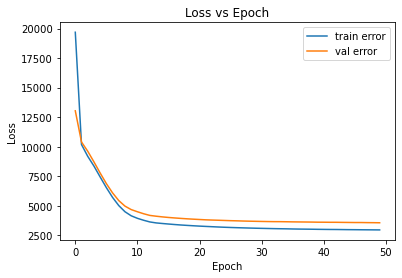

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

epoch_array = list(range(epochs))

plt.figure()
plt.plot(epoch_array, train_loss_array, label = "train error")
plt.plot(epoch_array, val_loss_array, label = "val error")
plt.legend()
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
